<a href="https://colab.research.google.com/github/ArathySatheesh/Machine_Learning/blob/main/Carpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

In [ ]:
data=pd.read_csv('/content/car data.csv')

In [ ]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
data.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
data.replace({"Fuel_Type":{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [ ]:
data.Fuel_Type.value_counts()

0    239
1     60
2      2
Name: Fuel_Type, dtype: int64

In [ ]:
data.Seller_Type.value_counts()

0    195
1    106
Name: Seller_Type, dtype: int64

In [ ]:
data.replace({"Seller_Type":{'Dealer':0,'Individual':1}},inplace=True)

In [ ]:
data.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [ ]:
data.replace({"Transmission":{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
data.Transmission.value_counts()

0    261
1     40
Name: Transmission, dtype: int64

In [ ]:
data.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [ ]:
X=data.drop(['Car_Name','Selling_Price'],axis=1)
Y=data['Selling_Price']

In [ ]:
Y.shape

(301,)

In [ ]:
X.shape

(301, 7)

In [ ]:
Y = pd.DataFrame(Y)
Y.shape

(301, 1)

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
lin_reg_model=LinearRegression()

In [ ]:
X_train.shape

(240, 7)

In [ ]:
Y_train.shape

(240, 1)

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
prediction=lin_reg_model.predict(X_train)

In [ ]:
error_score=metrics.r2_score(Y_train,prediction)

In [ ]:
print(error_score)

0.8838169193709796


In [ ]:
prediction_test=lin_reg_model.predict(X_test)

In [ ]:
error_score_test=metrics.r2_score(Y_test,prediction_test)

In [ ]:
error_score_test

0.8401532365377697

Most of the values are closer to each other, as the price value increases there is some gap.

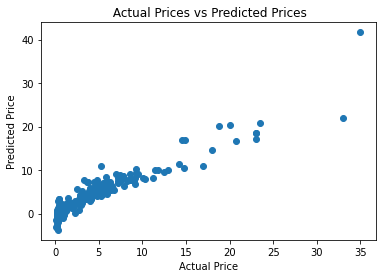

In [ ]:
plt.scatter(Y_train, prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

There are only few values here,as it's test, if there are more data we will get even better predictions. In this case the points are closer and lying on the same line


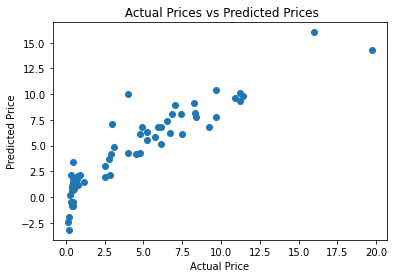

In [ ]:
plt.scatter(Y_test, prediction_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
las_regr=Lasso()

In [ ]:
las_regr.fit(X_train,Y_train)

Lasso()

In [ ]:
las_prediction=las_regr.predict(X_train)

In [ ]:
error_score=metrics.r2_score(Y_train,las_prediction)

In [ ]:
error_score

0.843587395258283

Here, lasso regression is better, as the points are much closer.

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

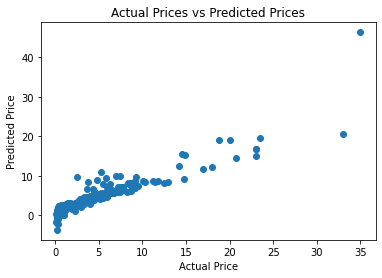

In [ ]:
plt.scatter(Y_train,las_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')

In [ ]:
las_prediction_test=las_regr.predict(X_test)

In [ ]:
error_score_test=metrics.r2_score(Y_test,las_prediction_test)

In [ ]:
error_score_test

0.8497457570738539

Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

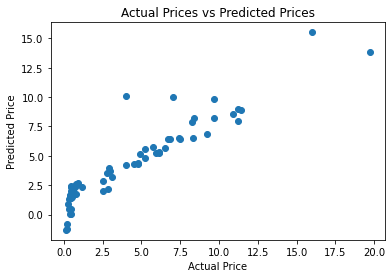

In [ ]:
plt.scatter(Y_test,las_prediction_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')